In [7]:
# import pandas as pd
import numpy as np
import pandas_profiling 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%pylab

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [8]:
data = pd.read_csv("../Data/EnergyStar.csv")

In [9]:
data.head(3)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286.0,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,619.4,5/1/17 17:32,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400.0,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,404.3,4/27/17 11:23,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226.0,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,Not Available,4/27/17 11:23,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...


In [10]:
data = data.replace({'Not Available': np.nan})

In [15]:
data.isna().sum()
# len(data)

Order                                                             7
Property Id                                                     677
Property Name                                                   677
Parent Property Id                                              677
Parent Property Name                                            677
BBL - 10 digits                                                 688
NYC Borough, Block and Lot (BBL) self-reported                  688
NYC Building Identification Number (BIN)                        828
Address 1 (self-reported)                                       680
Address 2                                                     11570
Postal Code                                                     680
Street Number                                                   799
Street Name                                                     797
Borough                                                         794
DOF Gross Floor Area                            

In [6]:
# Iterate through the columns
for col in list(data.columns):
    # Select columns that should be numeric
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        # Convert the data type to float
        data[col] = data[col].astype(float)

In [7]:
data_test = data[0:1000]

In [8]:
# data_test.profile_report()
#the sample didn't represent the overall data best and hence let's drop those columns with more than 6k missing values 

In [9]:
data.isna().sum()

Order                                                             7
Property Id                                                     677
Property Name                                                   677
Parent Property Id                                              677
Parent Property Name                                            677
BBL - 10 digits                                                 688
NYC Borough, Block and Lot (BBL) self-reported                  688
NYC Building Identification Number (BIN)                        828
Address 1 (self-reported)                                       680
Address 2                                                     11570
Postal Code                                                     680
Street Number                                                   799
Street Name                                                     797
Borough                                                         794
DOF Gross Floor Area                            

In [10]:
# # del data["Address 2"]
# data.drop(["2nd Largest Property Use Type","2nd Largest Property Use - Gross Floor Area (ft²)",
#            "3rd Largest Property Use Type","3rd Largest Property Use Type - Gross Floor Area (ft²)",
#    "Fuel Oil #1 Use (kBtu)","Fuel Oil #2 Use (kBtu)","Fuel Oil #4 Use (kBtu)","Fuel Oil #5 & 6 Use (kBtu)","Diesel #2 Use (kBtu)",
#    "District Steam Use (kBtu)"],axis=1, inplace=True)

In [11]:
nans = lambda df: df[df.isnull().any(axis=1)]

//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
//anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
//anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
//anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.a

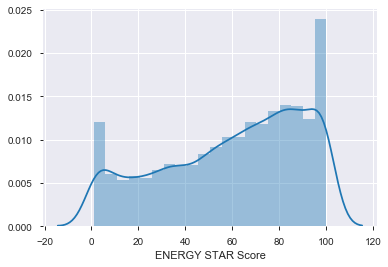

In [12]:
sns.distplot(data["ENERGY STAR Score"],bins=20);
figsize(5, 5)

AxesSubplot(0.1,0.15;0.8x0.75)


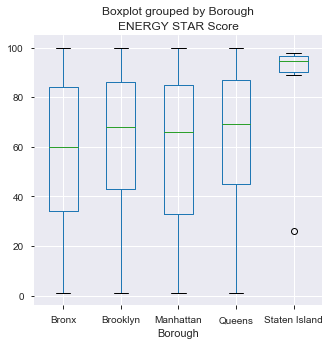

In [13]:
print(data.boxplot(column='ENERGY STAR Score',by="Borough"))

In [14]:
data=data.dropna(subset = ['ENERGY STAR Score'])

//anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


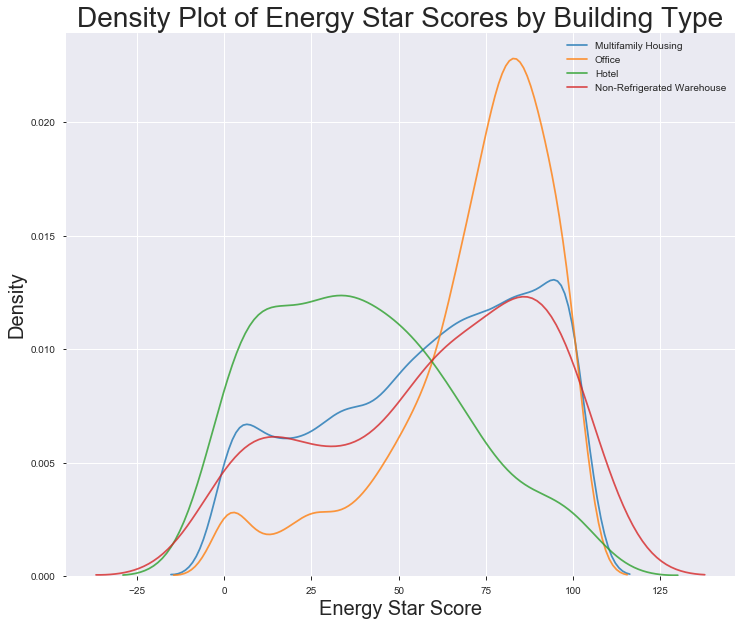

In [15]:
types = data.dropna(subset=['ENERGY STAR Score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)


# # Plot of distribution of scores for building categories
figsize(12, 10)

# # Plot each building
for b_type in types:
    # Select the building type
    subset = data[data['Largest Property Use Type'] == b_type]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['ENERGY STAR Score'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
    
# # label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Building Type', size = 28);


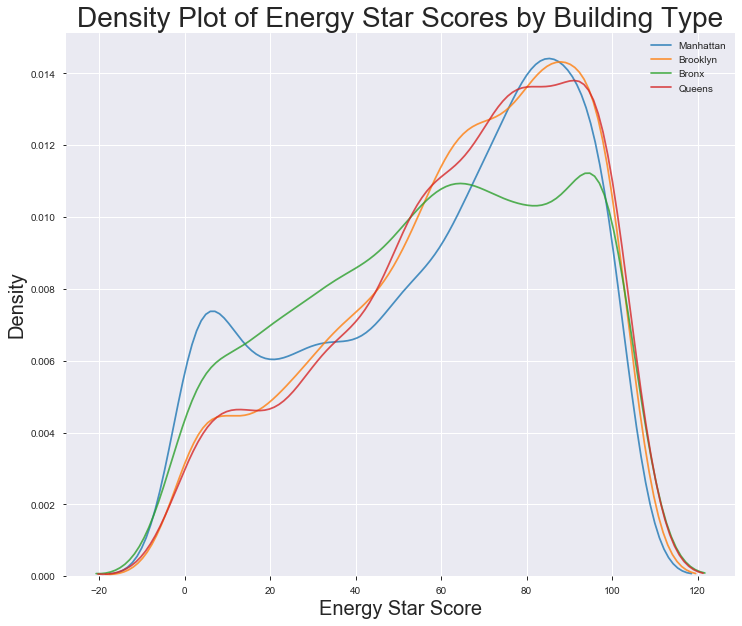

In [16]:
types = data.dropna(subset=['ENERGY STAR Score'])
types = types['Borough'].value_counts()
types = list(types[types.values > 100].index)


# # Plot of distribution of scores for building categories
figsize(12, 10)

# # Plot each building
for b_type in types:
    # Select the building type
    subset = data[data['Borough'] == b_type]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['ENERGY STAR Score'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
    
# # label the plot
plt.xlabel('Energy Star Score', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of Energy Star Scores by Building Type', size = 28);

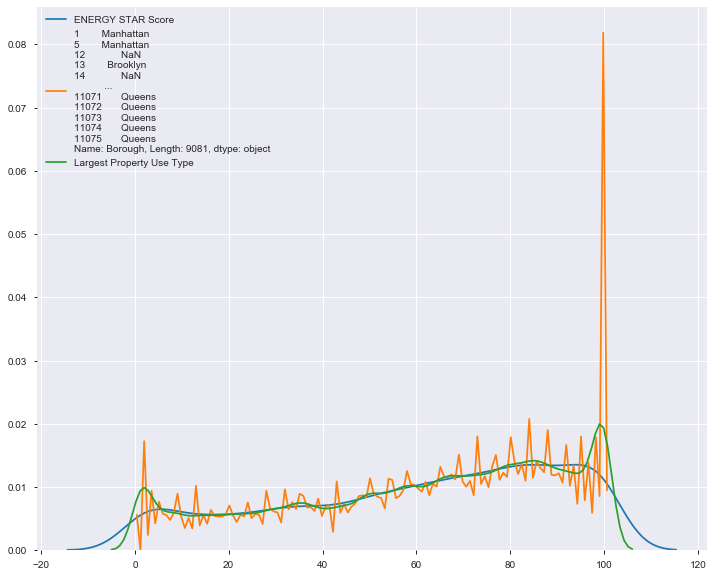

In [17]:
sns.kdeplot(data["ENERGY STAR Score"])
sns.kdeplot(data["ENERGY STAR Score"], bw=.2, label=data['Borough'])
sns.kdeplot(data["ENERGY STAR Score"], bw=2, label="Largest Property Use Type")
plt.legend();

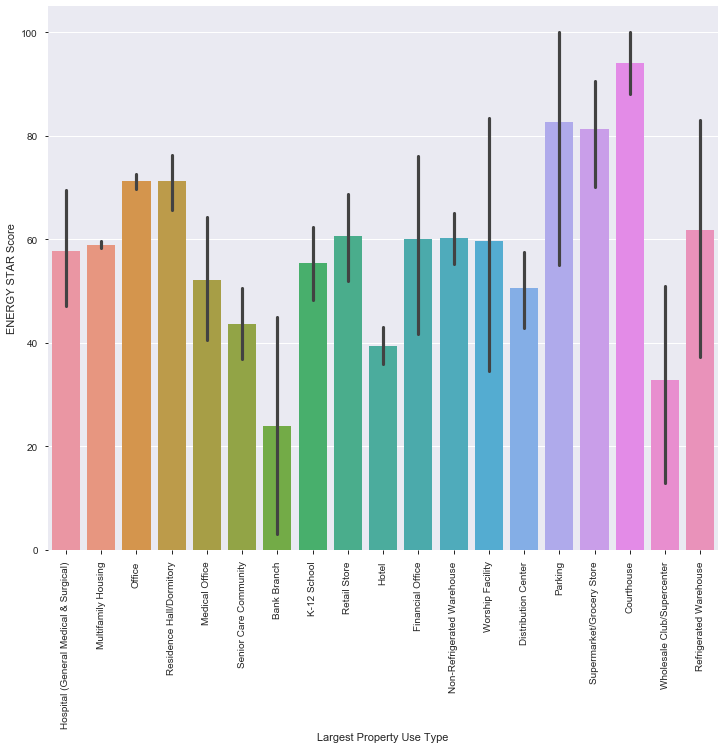

In [18]:
g = sns.barplot(x="Largest Property Use Type", y="ENERGY STAR Score",
           data=data);
plt.setp(g.get_xticklabels(), rotation=90)
figsize = 11,11

#sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

In [19]:
data_1 = data[data["ENERGY STAR Score"].notnull()]

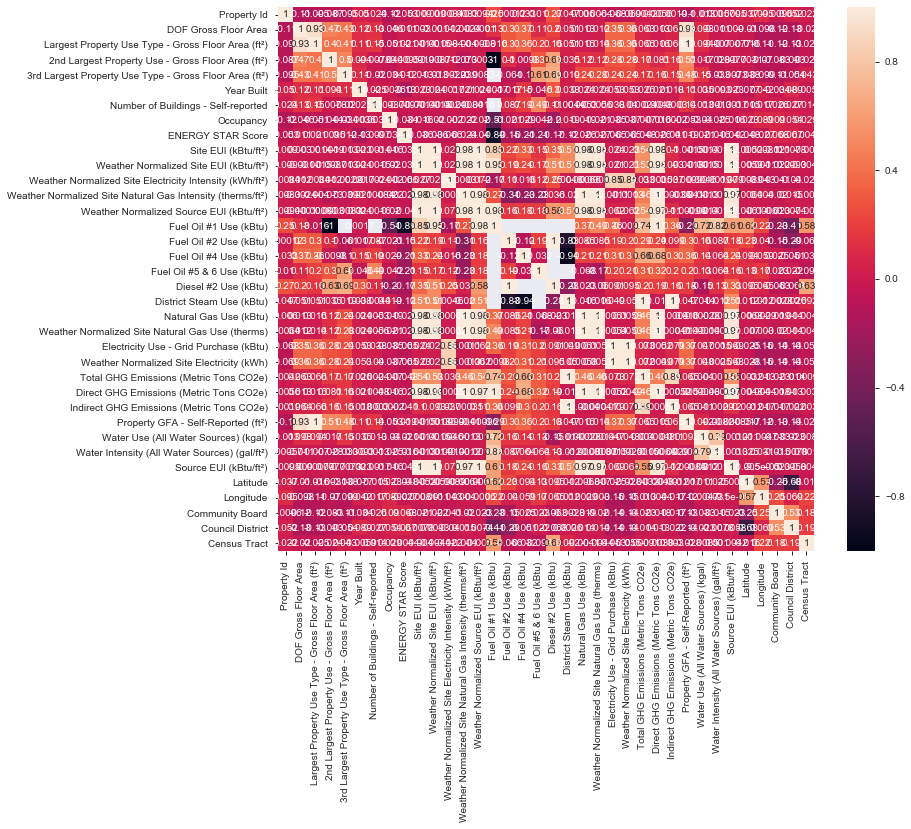

In [20]:
# Find all correlations with the score and sort 
correlations_data = data.corr()['ENERGY STAR Score'].sort_values()
correlations_data
sns.heatmap(data.corr(), annot=True)

In [21]:
len(data)

9081

In [22]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [23]:
missing_values_table(data)

Your selected dataframe has 60 columns.
There are 40 columns that have missing values.


,Missing Values,% of Total Values
Fuel Oil #1 Use (kBtu),9073,99.9
Diesel #2 Use (kBtu),9070,99.9
Address 2,8945,98.5
Fuel Oil #5 & 6 Use (kBtu),8669,95.5
3rd Largest Property Use Type,8325,91.7
3rd Largest Property Use Type - Gross Floor Area (ft²),8325,91.7
District Steam Use (kBtu),8323,91.7
Fuel Oil #4 Use (kBtu),8002,88.1
Fuel Oil #2 Use (kBtu),7058,77.7
2nd Largest Property Use Type,6804,74.9


In [24]:
# Get the columns with > 50% missing
missing_df = missing_values_table(data);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 60 columns.
There are 40 columns that have missing values.
We will remove 11 columns.


In [25]:
data = data.drop(columns = list(missing_columns))

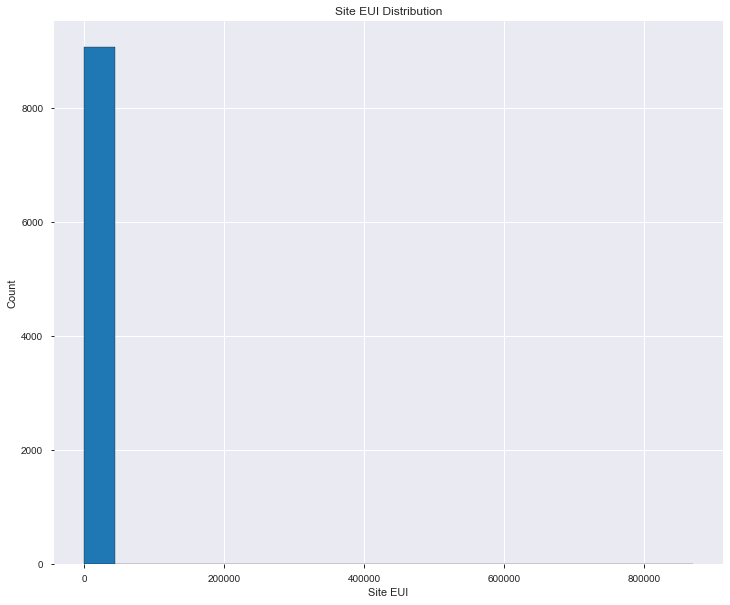

In [26]:
# Histogram Plot of Site EUI
# figsize(8, 8)
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), bins = 20, edgecolor = 'black');
plt.xlabel('Site EUI'); 
plt.ylabel('Count'); plt.title('Site EUI Distribution');

In [27]:
data['Site EUI (kBtu/ft²)'].describe()

count      9081.000000
mean        240.860588
std        9306.532134
min           0.000000
25%          62.900000
50%          78.600000
75%          96.800000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

In [28]:
data['Site EUI (kBtu/ft²)'].dropna().sort_values().tail(10)

3163     22259.0
6885     25789.4
3265     28373.6
847      34326.8
3139     50621.6
2262     50823.6
3173     51328.8
3170     51831.2
3898    126307.4
8068    869265.0
Name: Site EUI (kBtu/ft²), dtype: float64

In [29]:
data.loc[data['Site EUI (kBtu/ft²)'] == 869265, :]

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
8068,9984,4414323.0,234 Skillman,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3028937502,3028937502,"3390250 , 3338313",234 Skillman avenue,11211,...,912801.1,5/1/17 23:34,NaN,In Compliance,40.716233,-73.94141,1.0,34.0,477.0,East Williamsburg ...


In [30]:
first_quartile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quartile = data['Site EUI (kBtu/ft²)'].describe()['75%']

In [31]:
iqr = third_quartile - first_quartile

In [32]:
data = data[(data['Site EUI (kBtu/ft²)'] > (first_quartile - 3 * iqr)) &
            (data['Site EUI (kBtu/ft²)'] < (third_quartile + 3 * iqr))]

//anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


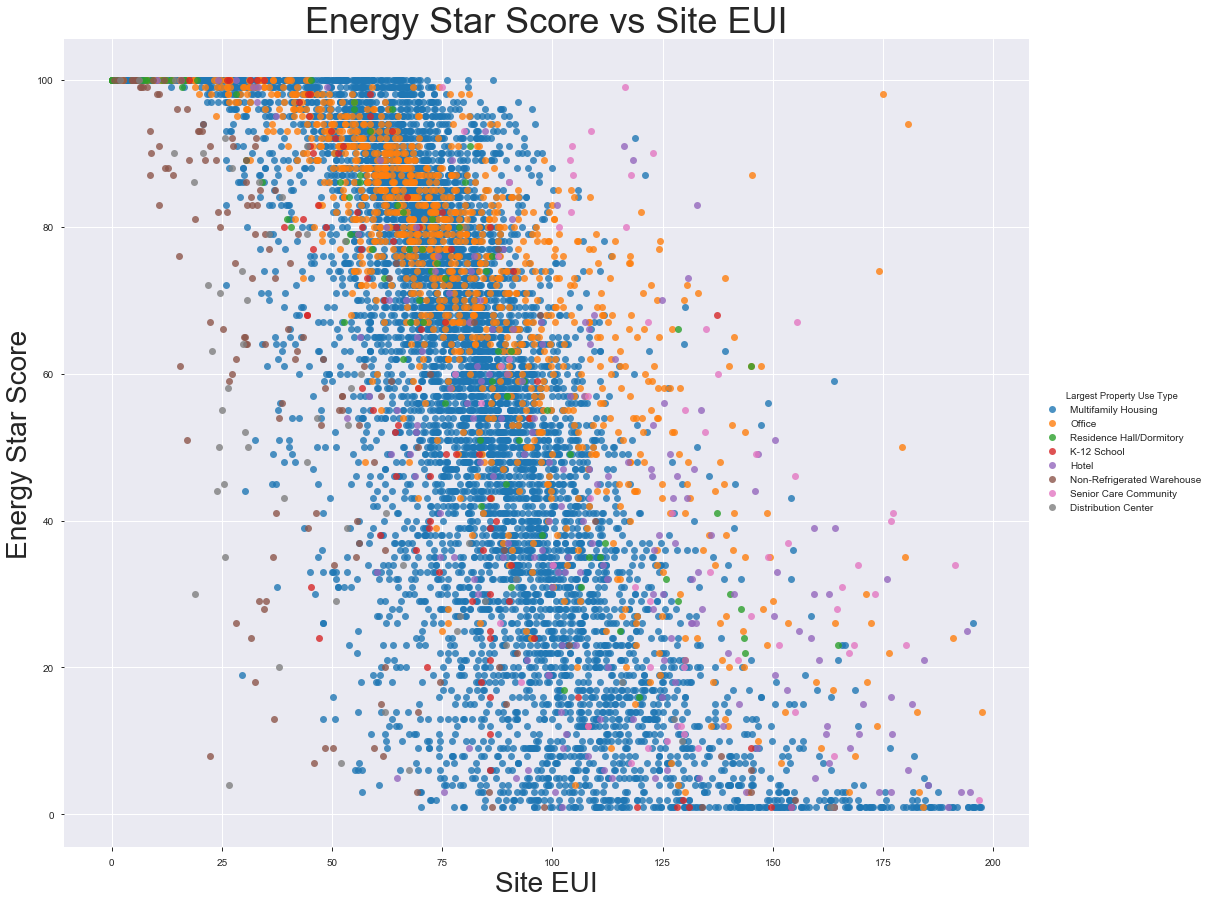

In [33]:
figsize = 11,11

# Limit to building types with more than 100 observations (from previous code)
types = data.dropna(subset=['ENERGY STAR Score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 50].index)
features = data[data['Largest Property Use Type'].isin(types)]

# Use seaborn to plot a scatterplot of Score vs Log Source EUI
sns.lmplot('Site EUI (kBtu/ft²)', 'ENERGY STAR Score', 
          hue = 'Largest Property Use Type', data = features,
          fit_reg = False,
          size = 12, aspect = 1.2);

# Plot labeling
plt.xlabel("Site EUI", size = 28)
plt.ylabel('Energy Star Score', size = 28)
plt.title('Energy Star Score vs Site EUI', size = 36);

In [34]:
numeric_subset = data.select_dtypes('number')
# Create columns with square root and log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'ENERGY STAR Score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
categorical_subset = data[['Borough', 'Largest Property Use Type']]
categorical_subset = pd.get_dummies(categorical_subset)
features = pd.concat([numeric_subset, categorical_subset], axis = 1)
features = features.dropna(subset = ['ENERGY STAR Score'])
features.shape

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
//anaconda3/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
//anaconda3/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: invalid val

(8907, 106)

In [35]:
features["ENERGY STAR Score"]

12        93.0
18        72.0
19        67.0
20        80.0
21       100.0
         ...  
11071     18.0
11072     10.0
11073      9.0
11074     64.0
11075     61.0
Name: ENERGY STAR Score, Length: 8907, dtype: float64

In [36]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['ENERGY STAR Score']
    x = x.drop(columns = ['ENERGY STAR Score'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
#     print(drops)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # Add the score back in to the data
    x['ENERGY STAR Score'] = y
               
    return x

In [37]:
features = remove_collinear_features(features, 0.6);

In [38]:
features  = features.dropna(axis=1, how = 'all')
features.shape

(8907, 37)

In [39]:
from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(data,test_size = 0.2)

In [40]:
no_score = features[features['ENERGY STAR Score'].isna()]
score = features[features['ENERGY STAR Score'].notnull()]

print(no_score.shape)
print(score.shape)
# features = features.drop(columns = "ENERGY STAR Score")
# targets = pd.DataFrame(features["ENERGY STAR Score"])

# # Replace the inf and -inf with nan (required for later imputation)

# Separate out the features and targets
targets = pd.DataFrame(score['ENERGY STAR Score'])
features = score.drop(columns='ENERGY STAR Score')


# Replace the inf and -inf with nan (required for later imputation)
# features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# # Split into 70% training and 30% testing set
X, X_test, y, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(0, 37)
(8907, 37)
(6234, 36)
(2673, 36)
(6234, 1)
(2673, 1)


In [41]:
# features1 = features

In [43]:
# features = features1

NameError: name 'features1' is not defined

In [44]:
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [45]:
baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 66.00
Baseline Performance on the test set: MAE = 24.6438


In [46]:
no_score.to_csv('no_score.csv', index = False)
X.to_csv('training_features.csv', index = False)
X_test.to_csv('testing_features.csv', index = False)
y.to_csv('training_labels.csv', index = False)
y_test.to_csv('testing_labels.csv', index = False)

In [54]:
train_features = pd.read_csv('training_features.csv')
test_features = pd.read_csv('testing_features.csv')
train_labels = pd.read_csv('training_labels.csv')
test_labels = pd.read_csv('testing_labels.csv')

In [ ]:
train_features = train_features.fillna(train_features.median())
test_features = test_features.fillna(train_features.median())

In [88]:
# from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
# Create an imputer object with a median filling strategy
imputer = SimpleImputer(strategy='mean')
# Train on the training features
imputer.fit(train_features)
# Transform both training data and testing data
X = imputer.transform(train_features)
X_test = imputer.transform(test_features)

In [87]:
np.nan_to_num(test_features)

array([[2.663923e+06, 8.156400e+04, 1.959000e+03, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [2.719886e+06, 1.669650e+05, 1.999000e+03, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [2.790741e+06, 7.613000e+04, 1.999000e+03, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [5.979503e+06, 6.110000e+04, 1.983000e+03, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [2.894314e+06, 7.050700e+04, 1.935000e+03, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [4.408047e+06, 7.424300e+04, 1.966000e+03, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]])

In [84]:
test_features.is().sum()

Property Id                                                        0
DOF Gross Floor Area                                               0
Year Built                                                         0
Number of Buildings - Self-reported                                0
Occupancy                                                          0
Site EUI (kBtu/ft²)                                                0
Weather Normalized Site Electricity Intensity (kWh/ft²)            0
Weather Normalized Site Natural Gas Intensity (therms/ft²)         0
Natural Gas Use (kBtu)                                             0
Weather Normalized Site Natural Gas Use (therms)                   0
Water Intensity (All Water Sources) (gal/ft²)                      0
Latitude                                                           0
Longitude                                                          0
Community Board                                                    0
Census Tract                      

In [81]:
test_features.replace([np.inf, -np.inf], np.nan, inplace=True)


In [89]:
from sklearn.preprocessing import MinMaxScaler
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))
# Fit on the training data
scaler.fit(X)
# Transform both the training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [95]:
# Convert y to one-dimensional array (vector)
y = np.array(train_labels).reshape((-1, ))
y_test = np.array(test_labels).reshape((-1, ))

In [97]:
from sklearn.ensemble import GradientBoostingRegressor

# Create the model
gradient_boosted = GradientBoostingRegressor()

# Fit the model on the training data
gradient_boosted.fit(X, y)

# Make predictions on the test data
predictions = gradient_boosted.predict(X_test)

# Evaluate the model
mae = np.mean(abs(predictions - y_test))

print('Gradient Boosted Performance on the test set: MAE = %0.4f' % mae)

Gradient Boosted Performance on the test set: MAE = 9.8201


In [98]:

# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [101]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the test set: MAE = 13.1954


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/base.py:503: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [103]:
from sklearn.svm import SVR
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

Support Vector Machine Regression Performance on the test set: MAE = 10.7515


In [106]:

random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Regression Performance on the test set: MAE = 9.7620


In [107]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

K-Nearest Neighbors Regression Performance on the test set: MAE = 12.0781


In [109]:
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

Gradient Boosted Regression Performance on the test set: MAE = 9.8234


In [117]:
# plt.style.use('fivethirtyeight')
# figsize(5, 5)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mae': [lr_mae, svm_mae, random_forest_mae, 
                                         gradient_boosted_mae, knn_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);
plt.show()

In [118]:
# Loss function to be optimized
loss = ['ls', 'lad', 'huber']

# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
                       'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [119]:
# Create the model to use for hyperparameter tuning
model = GradientBoostingRegressor(random_state = 42)

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [120]:
random_cv.fit(X, y)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.6min finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                            

In [121]:
# Get all of the cv results and sort by the test performance
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)

random_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_loss,...,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
12,11.786471,0.244677,0.018410,0.000344,500,6,6,None,5,lad,...,-8.858205,-9.082870,0.215583,1,-6.754102,-6.659626,-7.007988,-6.958773,-6.845122,0.143296
3,14.057306,0.156028,0.020501,0.000833,500,6,8,None,5,huber,...,-9.006492,-9.178305,0.206334,2,-4.088972,-4.273430,-4.138138,-4.268138,-4.192170,0.080535
9,7.425274,0.088945,0.015347,0.001563,500,4,2,auto,3,huber,...,-9.184567,-9.241113,0.199064,3,-6.808114,-6.766735,-6.927225,-6.952831,-6.863726,0.078217
0,1.921017,0.021735,0.005081,0.000084,100,2,6,auto,5,ls,...,-9.067692,-9.280593,0.224008,4,-7.086581,-7.118922,-7.228135,-7.079891,-7.128382,0.059453
13,11.933669,0.116252,0.050083,0.002389,1500,10,1,sqrt,5,lad,...,-9.204785,-9.422606,0.268488,5,-5.923958,-6.027584,-5.991686,-6.128621,-6.017962,0.073935
21,9.831022,0.103650,0.025571,0.004268,500,6,4,log2,5,huber,...,-9.280565,-9.426916,0.167549,6,-4.848769,-4.787065,-4.841875,-4.884578,-4.840572,0.034887
19,13.853383,0.303107,0.023397,0.000438,1100,6,2,auto,3,lad,...,-9.515929,-9.448694,0.123098,7,-7.539141,-8.380675,-8.517675,-8.505375,-8.235717,0.405724
7,5.984380,0.103207,0.015246,0.001242,500,4,6,auto,3,ls,...,-9.295688,-9.466758,0.133949,8,-6.809608,-6.873996,-7.010172,-6.890193,-6.895992,0.072486
10,80.085750,2.694145,0.099623,0.010237,1100,10,6,None,10,huber,...,-9.248815,-9.482393,0.348225,9,-0.356562,-0.371341,-0.399156,-0.386006,-0.378266,0.015932
2,65.705858,2.617344,0.105952,0.068086,500,4,2,auto,10,huber,...,-9.447143,-9.536471,0.165230,10,-0.113089,-0.130278,-0.138591,-0.132846,-0.128701,0.009503


In [122]:

random_cv.best_estimator_


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='lad', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=6, min_samples_split=6,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)